## Default Estimator and WoE Binning

#### Importing Libraries and Setting Up the Environment

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

### Load datasets

In [2]:
# Load the dataset from the CSV file
df=pd.read_csv('../data/final_df.csv')

In [3]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49+00:00,...,0,0,0,0,0,0,0,0,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08+00:00,...,0,0,0,0,0,0,0,1,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21+00:00,...,0,0,0,0,0,0,0,0,1,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55+00:00,...,0,0,0,0,0,1,0,0,1,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21+00:00,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09+00:00,...,0,0,0,0,0,0,0,1,0,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25+00:00,...,0,0,0,0,0,0,0,0,1,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35+00:00,...,0,0,0,0,0,0,0,1,0,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10+00:00,...,0,0,0,0,1,0,0,0,1,0


### Importing RFMS Risk Classifier and Model Evaluator for score calculation and evaluation

In [4]:
# RFMS Risk Classifier for score calculation
from scripts.calculate_RFMS_score import RFMSRiskClassifier  

### Construct the Default Estimator (Proxy)

- Use RFMS scores to create a boundary between "good" (low-risk) and "bad" (high-risk) customers.
- Visualize customer transactions in the RFMS space to understand where to establish the boundary.
- Based on the RFMS score, assign customers to "good" or "bad" risk categories.

#### Running the Risk Classification Model

In [5]:
from datetime import datetime
# Get the current date dynamically in 'YYYY-MM-DD' format for risk classification
current_date = datetime.now().strftime('%Y-%m-%d')

# Instantiate the RFMSRiskClassifier with the processed DataFrame
rfms_classifier = RFMSRiskClassifier(df)

In [6]:
rfms_classifier.calculate_recency(current_date)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,...,0,0,0,0,0,0,0,1,0,2264
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,...,0,0,0,0,0,0,1,0,0,2264
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,...,0,0,0,0,0,0,0,1,0,2264
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,...,0,0,0,0,1,0,0,1,0,2264
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,...,0,0,0,0,0,0,1,0,0,2264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,...,0,0,0,0,0,0,1,0,0,2174
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,...,0,0,0,0,0,0,0,1,0,2174
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,...,0,0,0,0,0,0,1,0,0,2174
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,...,0,0,0,1,0,0,0,1,0,2174


In [7]:
# Step 2: Calculate Frequency
rfms_classifier.calculate_frequency()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,...,0,0,0,0,0,0,1,0,2264,119
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,...,0,0,0,0,0,1,0,0,2264,119
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,...,0,0,0,0,0,0,1,0,2264,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,...,0,0,0,1,0,0,1,0,2264,38
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,...,0,0,0,0,0,1,0,0,2264,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,...,0,0,0,0,0,1,0,0,2174,573
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,...,0,0,0,0,0,0,1,0,2174,43
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,...,0,0,0,0,0,1,0,0,2174,43
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,...,0,0,1,0,0,0,1,0,2174,524


In [8]:
# Step 3: Calculate Monetary
rfms_classifier.calculate_monetary()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,...,0,0,0,0,0,1,0,2264,119,3.532703
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,...,0,0,0,0,1,0,0,2264,119,3.532703
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,...,0,0,0,0,0,1,0,2264,2,0.000603
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,...,0,0,1,0,0,1,0,2264,38,0.356884
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,...,0,0,0,0,1,0,0,2264,38,0.356884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,...,0,0,0,0,1,0,0,2174,573,82.620544
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,...,0,0,0,0,0,1,0,2174,43,0.455955
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,...,0,0,0,0,1,0,0,2174,43,0.455955
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,...,0,1,0,0,0,1,0,2174,524,68.904032


In [9]:
# Step 4: Calculate Seasonality
rfms_classifier.calculate_seasonality()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,Seasonality
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,...,0,0,0,0,1,0,2264,119,3.532703,4
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,...,0,0,0,1,0,0,2264,119,3.532703,4
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,...,0,0,0,0,1,0,2264,2,0.000603,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,...,0,1,0,0,1,0,2264,38,0.356884,4
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,...,0,0,0,1,0,0,2264,38,0.356884,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,...,0,0,0,1,0,0,2174,573,82.620544,2
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,...,0,0,0,0,1,0,2174,43,0.455955,2
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,...,0,0,0,1,0,0,2174,43,0.455955,2
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,...,1,0,0,0,1,0,2174,524,68.904032,4


In [10]:
# Step 5: Normalize RFMS scores
rfms_classifier.normalize_rfms()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,Seasonality
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,...,0,0,0,0,1,0,1.0,0.028851,8.635304e-04,1.000000
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,...,0,0,0,1,0,0,1.0,0.028851,8.635304e-04,1.000000
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,...,0,0,0,0,1,0,1.0,0.000244,1.473271e-07,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,...,0,1,0,0,1,0,1.0,0.009046,8.723648e-05,1.000000
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,...,0,0,0,1,0,0,1.0,0.009046,8.723648e-05,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,...,0,0,0,1,0,0,0.0,0.139853,2.019568e-02,0.333333
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,...,0,0,0,0,1,0,0.0,0.010269,1.114531e-04,0.333333
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,...,0,0,0,1,0,0,0.0,0.010269,1.114531e-04,0.333333
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,...,1,0,0,0,1,0,0.0,0.127873,1.684283e-02,1.000000


In [11]:
# Step 6: Assign Risk Categories
classified_df=rfms_classifier.assign_risk_category(threshold=0.25)

#### Displaying the Classified DataFrame

In [12]:
# Filter unique CustomerID and keep the first occurrence of all columns
# Print and display the classified DataFrame after running the RFMSRiskClassifier
print("Classified DataFrame:")
classified_df = classified_df[['CustomerId','Recency','Frequency','Monetary','Seasonality','RFMS_score','Risk_category']]
classified_df

Classified DataFrame:


,CustomerId,Recency,Frequency,Monetary,Seasonality,RFMS_score,Risk_category
0,CustomerId_4406,1.0,0.028851,8.635304e-04,1.000000,0.507429,good
1,CustomerId_4406,1.0,0.028851,8.635304e-04,1.000000,0.507429,good
2,CustomerId_4683,1.0,0.000244,1.473271e-07,0.000000,0.250061,good
3,CustomerId_988,1.0,0.009046,8.723648e-05,1.000000,0.502283,good
4,CustomerId_988,1.0,0.009046,8.723648e-05,1.000000,0.502283,good
...,...,...,...,...,...,...,...
95657,CustomerId_3078,0.0,0.139853,2.019568e-02,0.333333,0.123346,bad
95658,CustomerId_3874,0.0,0.010269,1.114531e-04,0.333333,0.085928,bad
95659,CustomerId_3874,0.0,0.010269,1.114531e-04,0.333333,0.085928,bad
95660,CustomerId_1709,0.0,0.127873,1.684283e-02,1.000000,0.286179,good


In [13]:
classified_df = classified_df.groupby('CustomerId', as_index=False).first()
classified_df

,CustomerId,Recency,Frequency,Monetary,Seasonality,RFMS_score,Risk_category
0,CustomerId_1,0.933333,0.000000,1.165368e-08,0.000000,0.233333,bad
1,CustomerId_10,0.933333,0.000000,1.165368e-08,0.000000,0.233333,bad
2,CustomerId_1001,0.988889,0.000978,1.294172e-06,0.000000,0.247467,bad
3,CustomerId_1002,1.000000,0.002445,6.884655e-06,0.666667,0.417280,good
4,CustomerId_1003,0.133333,0.001222,1.921017e-06,0.000000,0.033639,bad
...,...,...,...,...,...,...,...
3737,CustomerId_992,0.055556,0.001222,1.921017e-06,0.000000,0.014195,bad
3738,CustomerId_993,0.288889,0.000978,1.294172e-06,0.000000,0.072467,bad
3739,CustomerId_994,1.000000,0.024450,6.240933e-04,1.000000,0.506268,good
3740,CustomerId_996,0.755556,0.003912,1.703664e-05,0.000000,0.189871,bad


#### Counting the Risk Categories in the Classified DataFrame

In [14]:
# Display the count of each risk category in the classified DataFrame
classified_df.Risk_category.value_counts()

Risk_category
bad     2728
good    1014
Name: count, dtype: int64

#### Visualizing User Segmentation in RFMS Space

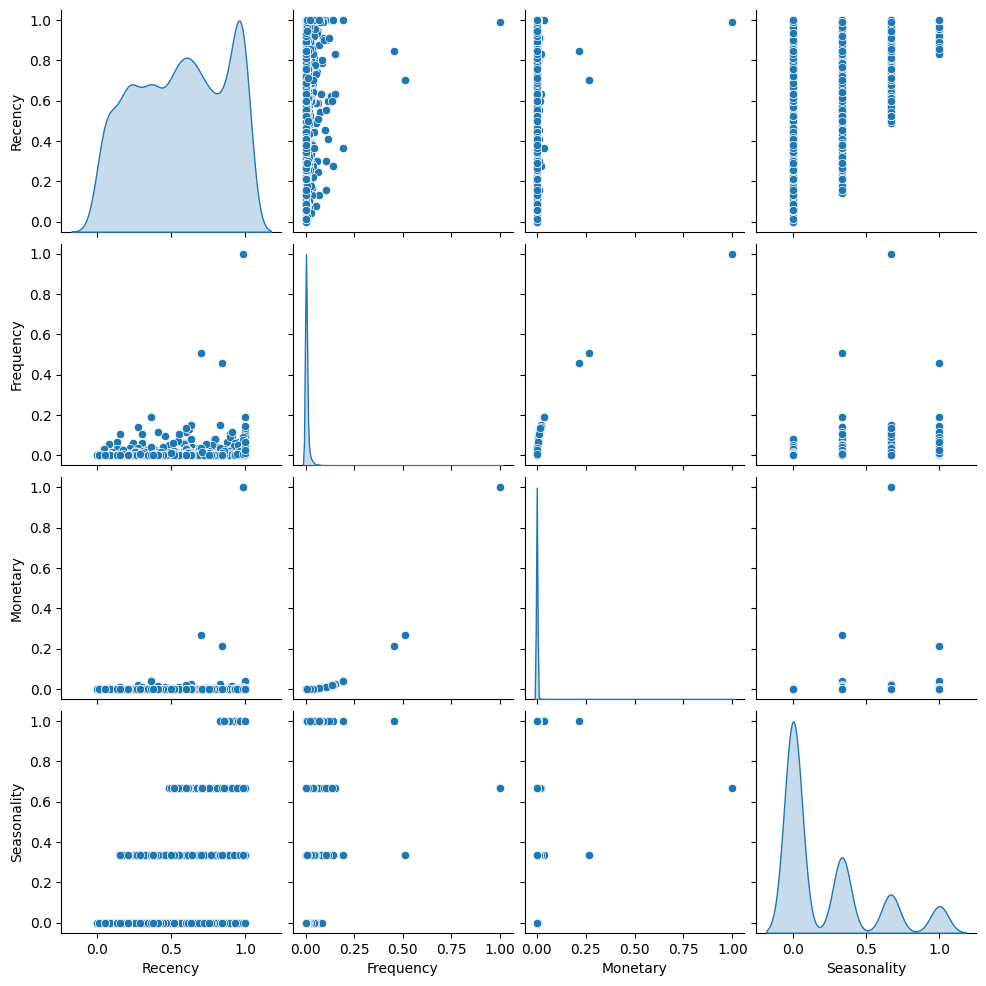

In [15]:
# We have RFMS columns: 'Recency', 'Frequency', 'Monetary', 'Seasonality'
# Create a pairplot to visualize the relationships between these RFMS features in the classified DataFrame
sns.pairplot(classified_df[['Recency', 'Frequency', 'Monetary', 'Seasonality']], diag_kind='kde')

# Display the plot
plt.show()